In [2]:
import pandas as pd
import plotly.express as px

In [4]:
pd.options.display.max_rows = 50

In [8]:
utah_df = pd.read_csv('utah-census-1880.csv')

In [10]:
utah_df

,key,page,line,district,location,county,household,family,lastname,firstname,...,deaf,idiotic,insane,maimed,attendschool,notread,notwrite,birthstate,fbirthplace,mbirthplace
0,0212A_2_NEWBOLD_29,0212A,2,3072,Smithfield,CACHE,9157,158,NEWBOLD,SAMUEL,...,n,n,n,n,n,n,n,ENGLAND,ENGLAND,ENGLAND
1,0163A_45_CHRISTIANSEN_37,0163A,45,2560,Hyrum,CACHE,150,151,CHRISTIANSEN,MARIAH,...,n,n,n,n,n,n,n,DENMARK,DENMARK,DENMARK
2,0120A_1_JENSEN_71,0120A,1,2048,Logan City,CACHE,1,1,JENSEN,OLEY,...,n,n,n,n,n,n,n,SWEDEN,SWEDEN,SWEDEN
3,0120A_2_JENSEN_69,0120A,2,2048,Logan City,CACHE,1,1,JENSEN,INGER,...,n,n,n,n,n,n,y,SWEDEN,SWEDEN,SWEDEN
4,0120A_3_ENGBER_6,0120A,3,2048,Logan City,CACHE,1,1,ENGBER,JOSEPH,...,n,n,n,n,n,n,n,UTAH,SWEDEN,SWEDEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142706,0543B_37__30,0543B,37,26624,Uintah Precinct,WEBER,42,45,NaN,JIM,...,n,n,n,n,n,n,n,CHINA,CHINA,CHINA
142707,0543B_38__25,0543B,38,26624,Uintah Precinct,WEBER,42,45,NaN,SING,...,n,n,n,n,n,n,n,CHINA,CHINA,CHINA
142708,154A_50_HARRINGTON_77,154A,50,20992,Springville City and Precinct,UTAH,9,10,HARRINGTON,JULIA,...,n,n,n,n,n,n,n,PENNSYLVANIA,PENNSLYVANIA,PENNSLYVANIA
142709,0064A_22_WIGHT_21,0064A,22,1024,"""Brigham City, Box Elder Precinct""",BOX ELDER,303,311,WIGHT,SARAH,...,n,n,n,n,n,n,n,UTAH,NEW YORK,ILLINOIS


In [12]:
county_counts = utah_df['county'].value_counts()
county_counts

county
SALT LAKE     31989
UTAH          17967
CACHE         12562
WEBER         12358
SANPETE       11538
BOX ELDER      6766
DAVIS          5166
SUMMIT         4921
TOOELE         4496
SEVIER         4457
WASHINGTON     4140
IRON           4034
BEAVER         3864
MILLARD        3719
JUAB           3477
KANE           3090
WASATCH        2928
MORGAN         1783
PIUTE          1616
UINTAH          799
EMERY           556
RICH            281
SAN JUAN        204
Name: count, dtype: int64

In [14]:
county_counts = county_counts.reset_index()
county_counts.columns = ['county', 'count']

county_counts

,county,count
0,SALT LAKE,31989
1,UTAH,17967
2,CACHE,12562
3,WEBER,12358
4,SANPETE,11538
5,BOX ELDER,6766
6,DAVIS,5166
7,SUMMIT,4921
8,TOOELE,4496
9,SEVIER,4457


In [16]:
fig = px.bar(county_counts, x = 'county', y = 'count')

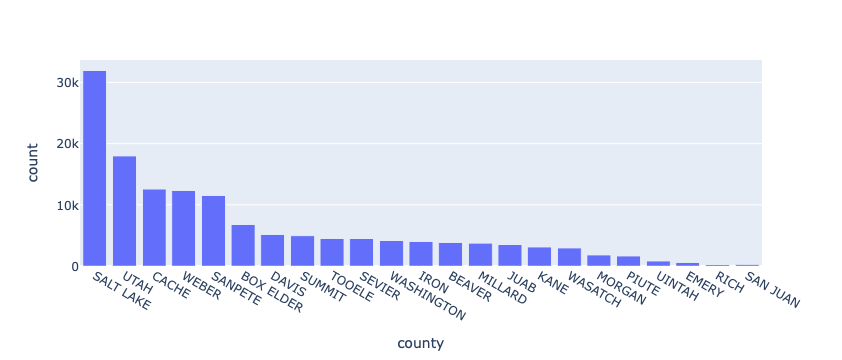

In [20]:
fig.show()

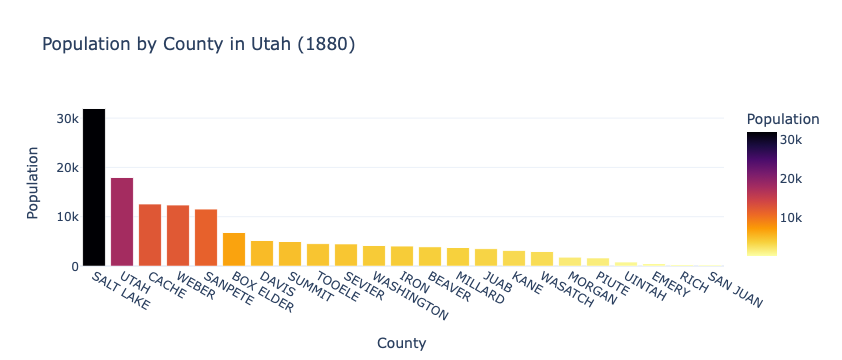

In [28]:
# Add color and use a cleaner template
fig = px.bar(
    county_counts,
    x='county',
    y='count',
    title='Population by County in Utah (1880)',
    labels={'county': 'County', 'count': 'Population'},
    color='count',                     # Color bars by population
    color_continuous_scale='Inferno_r',  # Use a reversed color scale
    template='plotly_white'            # Use a clean white template
)

# Display the chart
fig.show()

In [30]:
# First, let's prepare our data
# Count the frequency of each occupation, take the top 10, and reset the index
top_occupations = utah_df['occupation'].value_counts().head(10).reset_index()
top_occupations.columns = ['occupation', 'count']

# Display the prepared data
top_occupations

,occupation,count
0,KEEPING HOUSE,23031
1,AT HOME,13743
2,FARMER,9535
3,LABORER,6846
4,AT SCHOOL,6549
5,MINER,2596
6,WORKS ON FARM,2026
7,CARPENTER,1225
8,SERVANT,1219
9,FARM LABORER,1065


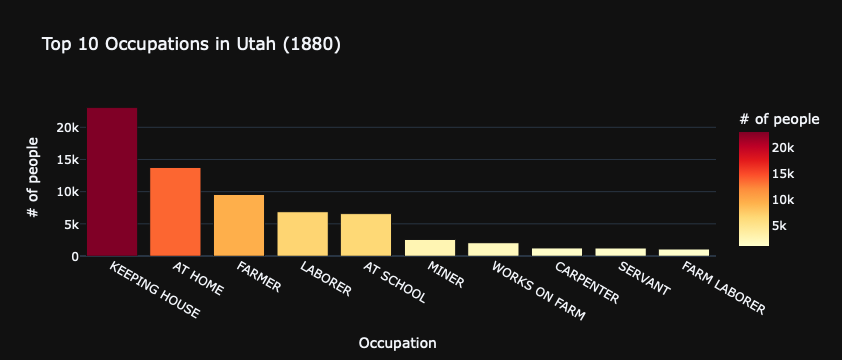

In [40]:
fig = px.bar(
    top_occupations,
    x='occupation',
    y='count',
    title='Top 10 Occupations in Utah (1880)',
    labels={'occupation': 'Occupation', 'count': '# of people'},
    color='count',                     # Color bars by population
    color_continuous_scale='YlOrRd',  # Use a reversed color scale
    template='plotly_dark'      # Use a clean white template
)

fig.show()

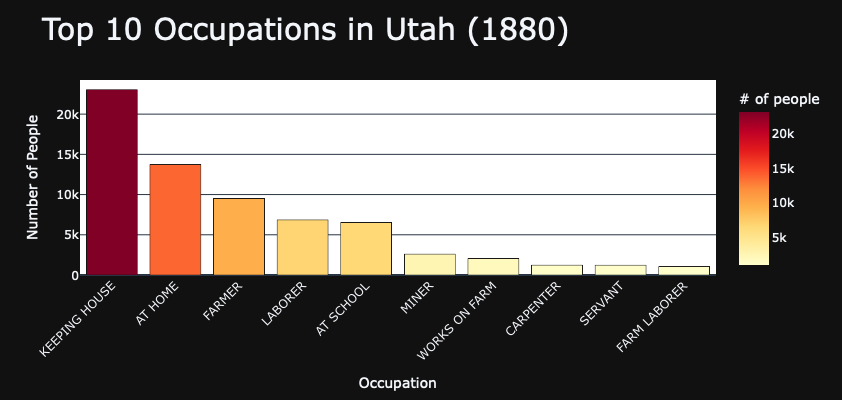

In [54]:
# Add color and use a cleaner template
fig = px.bar(
    top_occupations,
    x='occupation',
    y='count',
    title='Top 10 Occupations in Utah (1880)',
    labels={'occupation': 'Occupation', 'count': '# of people'},
    color='count',                     # Color bars by population
    color_continuous_scale='YlOrRd',  # Use a reversed color scale
    template='plotly_dark'      # Use a clean white template
)

# Update layout with additional customizations
fig.update_layout(
    xaxis_title='Occupation',                  # Customize x-axis title
    yaxis_title='Number of People',        # Customize y-axis title
    xaxis_tickangle=-45,                   # Rotate x-axis labels 45 degrees
    height=400,                            # Set chart height in pixels
    width=800,                             # Set chart width in pixels
    title_font=dict(size=30,),              # Change title font size
    plot_bgcolor='white',                   # Set plot background color
    margin=dict(l=80, r=50, t=80, b=80),   # Adjust margins (left, right, top, bottom)
    showlegend=True,                       # Show the color scale legend
    legend_title_text='Number of People',        # Set legend title
    hoverlabel=dict(                       # Customize hover label appearance
        bgcolor="black",
        font_size=12,
        font_family="Wingdings")
)

# Display the chart
fig.show()